In [1]:
%matplotlib inline

import subprocess
from pathlib import Path
from itertools import chain
from datetime import timedelta

import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

VIDEO_SRC = [r'D:\downloads\test_videos', r'D:\downloads\poi']
VIDEO_CSV = '../data/video_metadata.csv'

In [2]:
def get_video_data(video: Path, prefix='original-'):
    name = video.stem
    p = subprocess.run(['ffprobe', '-v', 'quiet', '-of', 'default=nw=1:nk=1',
                        '-show_entries', 'format=duration:stream=width,height',
                        str(video)], capture_output=True)
    width, height, duration = p.stdout.strip().split()
    name = name[len(prefix):] if name.startswith(prefix) else name
    width = int(width)
    height = int(height)
    duration = float(duration) if duration not in (b'', b'N/A') else 0.0
    return name, width, height, width*height, duration

video_src = Path(VIDEO_CSV)
column_types = [('video_id', str), ('width', int), ('height', int), ('area', int), ('duration', float)]
if video_src.exists():
    df = pd.read_csv(video_src, index_col=0, dtype=dict(column_types))
else:
    df = pd.DataFrame((get_video_data(video) for video in tqdm(chain(*[Path(p).glob('**\*.mp4') for p in VIDEO_SRC]))),
                      columns=[n for n, t in coumn_types])
    df.to_csv(video_src)
df.head()

,video_id,width,height,area,duration
0,-75gXEApdNQ,1920,1080,2073600,482.400
1,0VrxAn-goEw,854,480,409920,536.567
2,0yTEcgQNoQo,470,360,169200,1332.000
3,1dCoXH61eyc,1280,720,921600,691.800
4,26wTw6UGoAY,1280,720,921600,1211.800


In [3]:
df.describe()

,width,height,area,duration
count,8303.000000,8303.000000,8.303000e+03,8303.000000
mean,1215.051909,707.280260,1.004648e+06,1263.227589
std,535.773018,278.533416,7.499570e+05,906.510705
min,166.000000,144.000000,2.822400e+04,60.767000
25%,640.000000,480.000000,3.072000e+05,577.028000
50%,1280.000000,720.000000,9.216000e+05,901.399000
75%,1920.000000,1080.000000,2.073600e+06,1695.138500
max,3840.000000,2160.000000,8.294400e+06,3599.419000


In [4]:
duration = df['duration'].sum()
print(f"Total length of footage: {timedelta(seconds=duration)} ({duration} seconds)")

Total length of footage: 121 days, 9:29:38.669664 (10488578.669664 seconds)


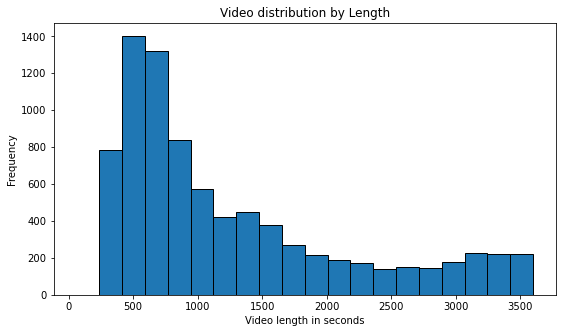

In [5]:
fig = plt.figure()
ax = plt.axes()
df['duration'].plot(kind='hist', bins=20, title='Video distribution by Length', figsize=(9, 5), edgecolor='black', ax=ax)
plt.xlabel('Video length in seconds')
plt.show()